### Notebook sur le jeu de test du Titanic


In [45]:
import os.path
trainDataSetPath = os.path.join("datasets","titanic","train.csv")
testDataSetPath = os.path.join("datasets","titanic","test.csv")
import pandas as pd 

In [46]:
dataDf = pd.read_csv(trainDataSetPath)
dataDf.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [47]:
dataDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [48]:
corr_matrix = dataDf.corr()
corr_matrix['Survived'] .sort_values(ascending = False)

C:\Users\stallard\AppData\Local\Temp\ipykernel_14592\1610635063.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataDf.corr()


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [49]:
from titanic.normalize import normalize 
nmDataDf = normalize.normalize(dataDf)
nmDataDf.head(10) 

28.0


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0
5,0,3,0,28.0,0,0,8.4583,2
6,0,1,0,54.0,0,0,51.8625,0
7,0,3,0,2.0,3,1,21.0750,0
8,1,3,1,27.0,0,2,11.1333,0
9,1,2,1,14.0,1,0,30.0708,1


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>,
        <Axes: title={'center': 'Sex'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>,
        <Axes: title={'center': 'Embarked'}>, <Axes: >]], dtype=object)

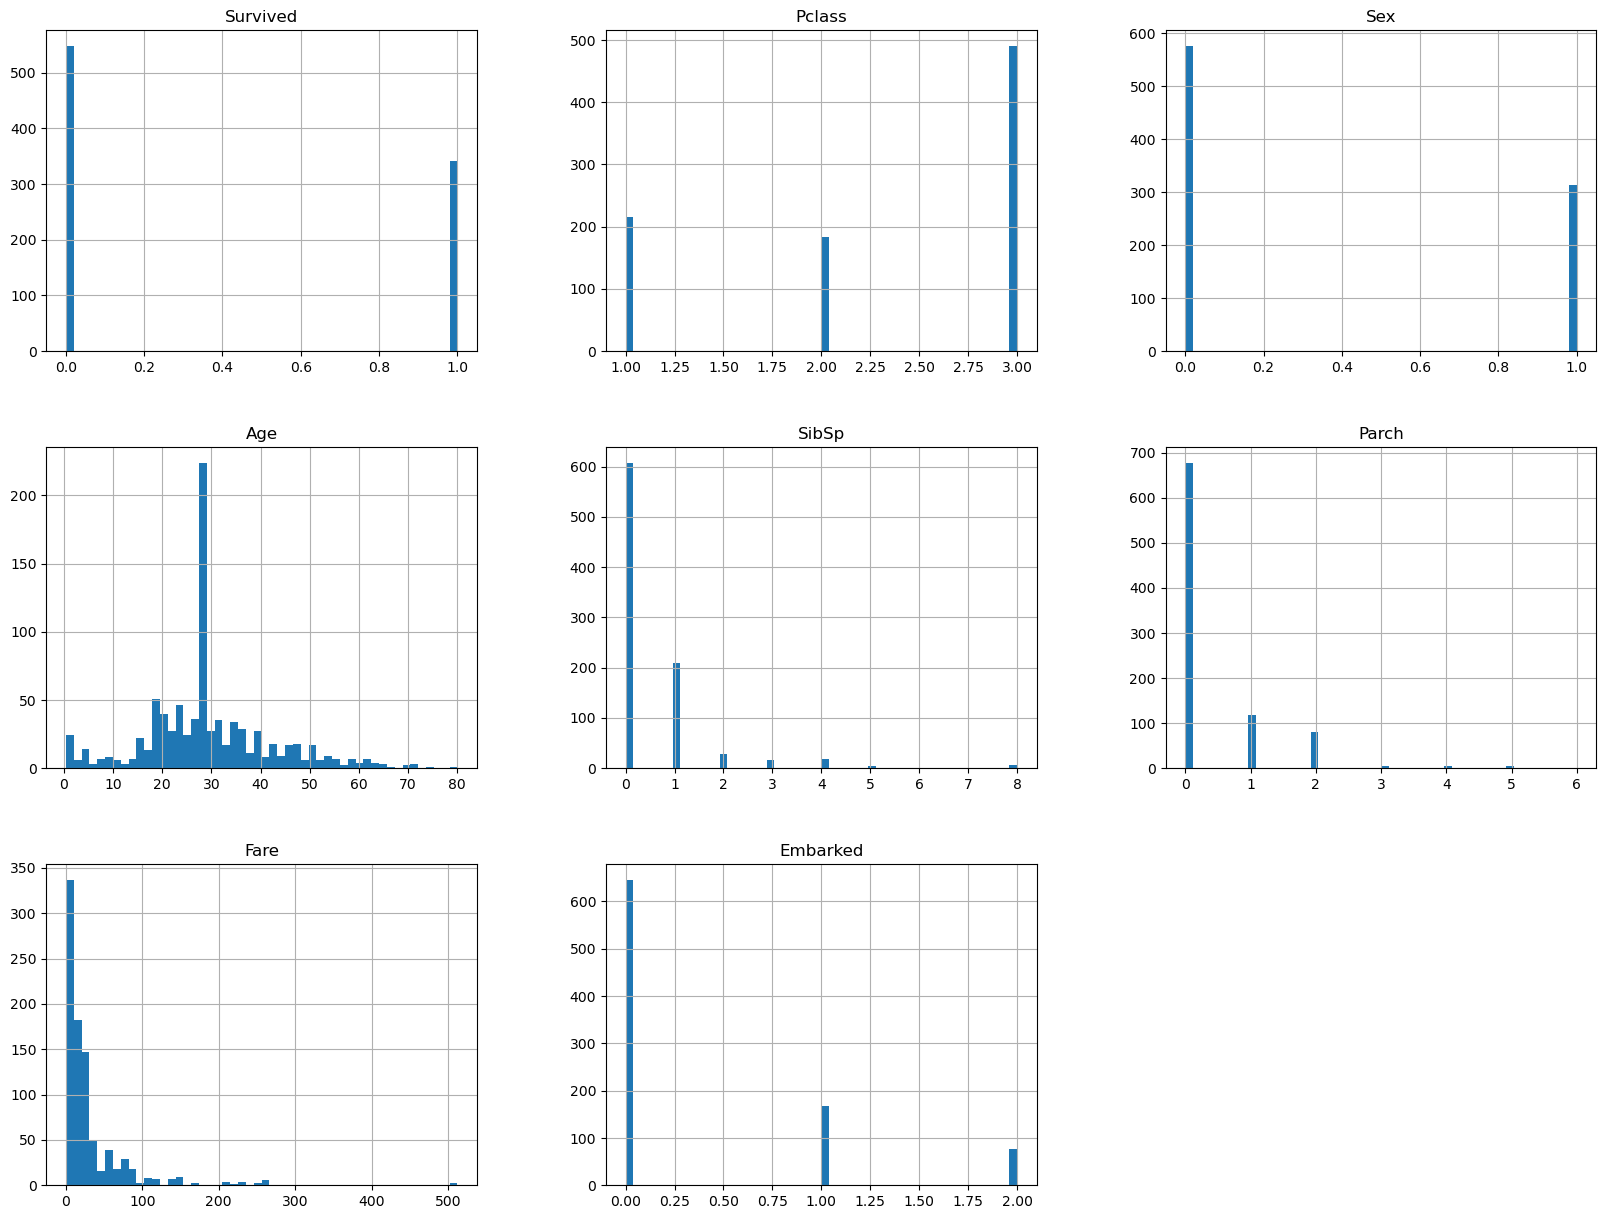

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
nmDataDf.hist(bins=50,figsize=(20,15))

# from pandas.plotting import scatter_matrix 
attributes = ['Survived','Pclass','Sex','Age','SibSp','Parch','Fare'] 
scatter_matrix(nmDataDf, figsize=(12,8))

#### Créer un jeu de test et un jeu d'entrainement 

In [51]:
from sklearn.model_selection import ShuffleSplit 

split = ShuffleSplit(n_splits=1, test_size=0.2,random_state=42) 
for train_index, test_index in split.split(nmDataDf,nmDataDf['Fare']):
    # set d'entrainement 
    trainSet = nmDataDf.loc[train_index]
    # set de test 
    testSet = nmDataDf.loc[test_index]

# résultats attendus 
target = trainSet['Survived']
# on enlève la colonne Survived car on ne veut pas apprendre sur cette colonne 
trainSet = trainSet.drop(columns=['Survived'])


#### On calcule les prédictions

###  On va utiliser un DecisionTreeClassifier 
####  Recherche des meilleurs paramétres par quadrillage

In [52]:
from sklearn.model_selection import GridSearchCV 
from sklearn.tree import DecisionTreeClassifier  
param_grid = [{ 
    'criterion' : [ 'gini', 'entropy', 'log_loss' ] , 
    'splitter'  : [ 'best', 'random' ] , 
    'max_depth' : [2,3,4] , 
    "min_samples_split" : [50 , 25 , 10 ]}
]
dcl = DecisionTreeClassifier()
gridSearch = GridSearchCV(dcl , param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True )

gridSearch.fit(trainSet,target )

gridSearch.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_split': 10,
 'splitter': 'best'}

In [53]:
from sklearn.tree import DecisionTreeClassifier 

dcl = DecisionTreeClassifier(criterion = 'entropy',
                             max_depth= 3,
                             min_samples_split = 10,
                             splitter='best') 
dcl.fit(trainSet,target)  

DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_split=10)

### Evaluation des predictions 

In [54]:
observed = testSet["Survived"]
observed = observed.to_numpy(dtype='int64', copy=True) 
testSet = testSet.drop(columns=['Survived'])
predictions = dcl.predict(testSet)
print(observed)
predictions

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [55]:
def evaluateResult(predictions):
    nbErrors = 0 
    for i in range(0,len(predictions)):
        if predictions[i] != observed[i]:
            nbErrors += 1
    ratio = (nbErrors / len(predictions) ) * 100 
    return nbErrors, ratio 

nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {dcl.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)')    
print()

 nb Erreurs pour la classe DecisionTreeClassifier: 36 (20.11%)



### Test d'un SGDClassifier 

In [56]:
from sklearn.linear_model import SGDClassifier 
sgdClf = SGDClassifier(random_state=42) 
# entraînement 
sgdClf.fit(trainSet,target)
predictions = sgdClf.predict(testSet)
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {sgdClf.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)')   

 nb Erreurs pour la classe SGDClassifier: 39 (21.79%)


In [57]:
from sklearn.linear_model import SGDRegressor 
sgdReg = SGDRegressor(max_iter=1000, tol=1e-3,penalty=None,eta0=0.1) 
# entraînement 
sgdReg.fit(trainSet,target)
predictions = sgdReg.predict(testSet)
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {sgdReg.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)')  

 nb Erreurs pour la classe SGDRegressor: 179 (100.00%)


In [58]:
from sklearn.linear_model import ElasticNet 
enReg = ElasticNet(alpha=0.1, l1_ratio=0.5) 
# entraînement 
enReg.fit(trainSet,target)
predictions = enReg.predict(testSet)
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {enReg.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)')  

 nb Erreurs pour la classe ElasticNet: 179 (100.00%)


In [59]:
from sklearn.svm import LinearSVC 
svmLinear = LinearSVC(C=1, loss="hinge",dual="auto",max_iter=10**6) 
# entraînement 
svmLinear.fit(trainSet,target)
predictions = svmLinear.predict(testSet)
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {svmLinear.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)') 

 nb Erreurs pour la classe LinearSVC: 39 (21.79%)


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

@ignore_warnings(category=ConvergenceWarning)
def gridsearchcv(model, itrainSet, itarget):

    param_grid = [{ 
        'penalty' : [ 'l2' ] , 
        'loss'  : [ 'hinge' ] , # 'squared_hinge' 
        'dual' : [True,False] , 
        "tol" : [10 ** -n for n in range(1,4) ] , 
        "C" : [0.5,1,1.5,2],
        "random_state" : [42] , 
        "max_iter" : [ 10 ** 6   ]}
    ]

    gridSearch = GridSearchCV(model , param_grid,cv=5,scoring='neg_mean_squared_error',return_train_score=True )
    gridSearch.fit(itrainSet,itarget )
    return gridSearch.best_params_

lSVC = LinearSVC()
bp = gridsearchcv(lSVC,trainSet,target)
print(bp) 

C:\Users\stallard\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\stallard\AppData\Local\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\stallard\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\stallard\AppData\Local\anaconda3\Lib\site-packages

{'C': 0.5, 'dual': True, 'loss': 'hinge', 'max_iter': 1000000, 'penalty': 'l2', 'random_state': 42, 'tol': 0.01}


### Test de LinearSVC mais en utilisant un StandardScaler sur les données en entrée 

In [30]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
svmLinear = LinearSVC(C=0.5, dual = True, 
                      loss= 'hinge', 
                       max_iter = 1000000, 
                       penalty = 'l2', 
                       random_state = 42, 
                       tol = 0.01 ) 
# entraînement 
# trainSetCleanSc = sc.fit_transform(trainSetClean)
svmLinear.fit(trainSet,target)
predictions = svmLinear.predict(testSet)
print(observed)
predictions


[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1], dtype=int64)

In [31]:
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {svmLinear.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)') 

 nb Erreurs pour la classe LinearSVC: 39 (21.79%)


In [34]:
from sklearn.svm import LinearSVR
svrLinear = LinearSVR(epsilon=0.0, 
                      tol=1e-4,
                      C=1.0,
                      loss='squared_epsilon_insensitive',
                      dual=False,
                      random_state=42,
                      max_iter=100000) 
# entraînement 
# trainSetCleanSc = sc.fit_transform(trainSetClean)
svrLinear.fit(trainSet,target)
predictions = svrLinear.predict(testSet)
print(observed)
predictions

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


array([ 8.78593960e-02,  2.49411501e-01,  1.45326201e-01,  8.67059895e-01,
        6.83112118e-01,  9.69348651e-01,  6.92254009e-01,  8.94474386e-02,
        7.47964976e-01,  9.37293981e-01,  3.55361468e-01,  3.39609875e-02,
        4.88988264e-01,  1.34794794e-01,  2.27333025e-01,  9.77523449e-01,
        3.31900897e-01,  6.92289948e-01,  2.69116251e-01,  3.47946927e-01,
        1.26742628e-01,  3.96752008e-01,  6.22150028e-01,  1.45916103e-01,
        1.11169099e-01,  4.15853386e-02,  4.05639838e-01,  2.50545928e-01,
        6.94408223e-02,  6.05949473e-01,  1.49955531e-01,  6.47685416e-01,
        4.62700773e-01,  6.19739178e-01,  1.54668083e-01,  1.12492522e-01,
        4.28668740e-01,  6.92254009e-01,  9.65277435e-01,  1.08172306e-01,
        2.45404041e-01,  6.36336074e-02,  1.08242277e-01,  1.80530223e-01,
        5.59810519e-01,  7.53390952e-02,  1.50074646e-01,  1.31988361e-01,
        1.26358829e-01,  3.20195881e-01,  6.68672879e-01,  7.95429134e-01,
       -5.93707562e-02,  

In [35]:
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {svrLinear.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)') 

 nb Erreurs pour la classe LinearSVR: 179 (100.00%)


In [38]:
from sklearn.ensemble import RandomForestClassifier , VotingClassifier

votingClf = VotingClassifier( estimators = [ ('svm', svmLinear) , ('clf', sgdClf) , ('dcl',dcl)  ] ,
                              voting='hard'
                            )
votingClf.fit(trainSet,target)
predictions = votingClf.predict(testSet)
print(observed)
print(predictions) 
nbErrors , ratio = evaluateResult(predictions)  
print(f' nb Erreurs pour la classe {votingClf.__class__.__name__}: {nbErrors} ({ratio:4.2f}%)') 

[1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]
[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1]
 nb Erreurs pour la classe VotingClassifier: 37 (20.67%)
